# Instagram Reviews Sentiment Analysis

Here is a concise breakdown of what I accomplished in the provided code:

1. **Imported Essential Libraries**: I started by importing crucial Python libraries such as NumPy, Pandas, Matplotlib, Seaborn, NLTK, WordCloud, and scikit-learn.

2. **Loaded Dataset**: I loaded a dataset containing Instagram reviews from a CSV file.

3. **Explored the Data**: I conducted an initial exploration of the dataset, understanding its dimensions, summary statistics, basic information, as well as the presence of missing values and duplicates.

4. **Data Cleaning**: I proceeded to clean the data by removing the 'review_date' column, eliminating duplicated records, and sanitizing the 'review_description' text by eliminating mentions, hashtags, retweets, and hyperlinks.

5. **Performed Sentiment Analysis**: I employed the TextBlob library to compute sentiment subjectivity and polarity for each review description.

6. **Generated Word Cloud**: I created a word cloud visualization based on the processed review descriptions, offering a visual representation of common terms.

7. **Categorized Sentiments**: I defined a function to categorize sentiments (negative, neutral, positive) relying on polarity values. This categorization was then applied to produce a new 'Sentiment Analysis' column.

8. **Visualized Data**: I employed various visualizations, including KDE plots and histograms, to showcase the distribution of polarity and the count of different sentiment categories.

9. **Implemented Machine Learning**: I transformed sentiment labels into numerical values, prepped the data for model training, and constructed a pipeline incorporating vectorization, TF-IDF transformation, and a Multinomial Naive Bayes classifier.

10. **Trained and Evaluated Model**: I trained the pipeline on a designated training set, utilized it to make predictions on a separate test set, and gauged the model's performance via metrics like a confusion matrix, classification report, and accuracy score.

In summary, I conducted a comprehensive sentiment analysis of Instagram reviews, undertook data cleaning and preparation, visualized sentiment distributions, and crafted a machine learning model for sentiment classification.

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from wordcloud import WordCloud

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import re
from textblob import TextBlob

## Importing dataset

In [3]:
df = pd.read_csv('/kaggle/input/instagram-play-store-reviews/instagram.csv')

## Understanding dataset

In [4]:
df.head()

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04


In [5]:
df.shape

(210542, 3)

In [6]:
df.describe()

,rating
count,210542.000000
mean,2.476337
std,1.580380
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210542 entries, 0 to 210541
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_description  210542 non-null  object
 1   rating              210542 non-null  int64 
 2   review_date         210542 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.8+ MB


In [8]:
df.isna().sum()

review_description    0
rating                0
review_date           0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Removing the date column from dataset and removing any duplicated value

In [10]:
df.drop('review_date', axis = 1, inplace = True)

In [11]:
df.duplicated().sum()

471

In [12]:
df.drop_duplicates(keep = 'first', inplace = True)

## Recheking for any error

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(210071, 2)

In [15]:
df.sample(5)

,review_description,rating
103767,I would like go give suggestion i have always ...,4
126969,Altleast this is the best alternative for Face...,4
37166,It was fun but now it won't let me upload phot...,2
186447,"App hasn't worked since yesterday, it keeps sa...",1
62238,I wanted to use the flying face filter for my ...,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210071 entries, 0 to 210541
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_description  210071 non-null  object
 1   rating              210071 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ MB


## Creating a function to clean text

In [17]:
def cleantext(text):
    # Removing mentions
    text = re.sub(r"@[0-9a-zA-Z]+", "", text)
    # Removing '#' from reviews
    text = re.sub(r"#", "", text)
    # Removing Retweets
    text = re.sub(r"RT[\s]+", "", text)
    # Removing hyperling
    text = re.sub(r"https?:\\/\\/S+", "", text)
    
    return text

## Applying the text cleaning function to 'review_description' column

In [18]:
df['review_description'] = df['review_description'].apply(cleantext)

In [19]:
df.sample(5)

,review_description,rating
109621,Trim isnt working. Apparently hasnt for YEARS ...,1
57778,This app is not worth your time. I'm suffering...,1
205231,This is a very good app but don't know why i a...,4
115196,"It crashes(beta version), everyday even though...",1
82169,Instagram suspended my account (basically.kimm...,1


## Creating a function to calculate sentiments

In [20]:
def calculate_sentiments(ds):
    sentiments = TextBlob(ds['review_description']).sentiment
    return pd.Series([sentiments.subjectivity, sentiments.polarity])

## Applying calculate_sentiment function to df

In [21]:
df[['Subjectivity', 'Polarity']] = df.apply(calculate_sentiments, axis = 1)

In [22]:
df.sample(5)

,review_description,rating,Subjectivity,Polarity
4982,What's going on with Instagram.. When I logged...,3,0.562500,0.000000
155673,possibly the worst social media app in existen...,1,0.618651,-0.174603
68850,Trust Facebook to ruin the fun. It used to be ...,1,0.530000,0.046667
60102,The app simply doesn't work regardless of how ...,1,0.548095,-0.120000
126582,Worse exprience with video calls just worse. I...,1,0.380000,-0.040000


## Generate a word cloud from cleaned data

In [23]:
all_words = " ".join(words for words in df['review_description'])

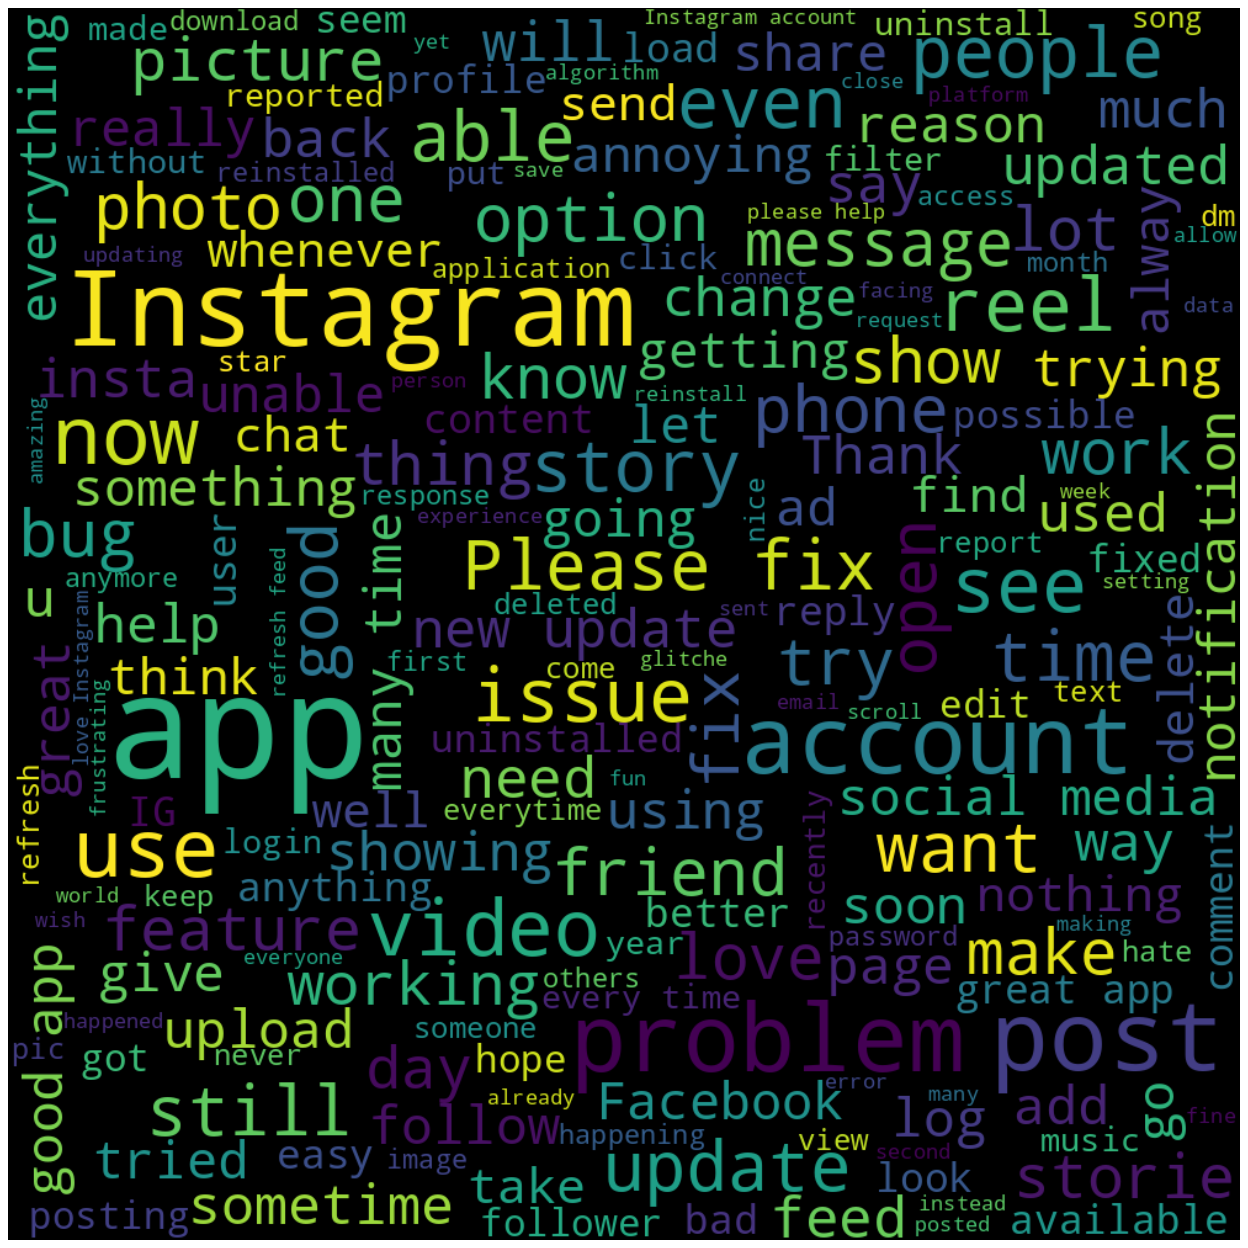

In [24]:
wordcloud = WordCloud(width = 1000,
                      height = 1000,
                      random_state = 21,
                      max_font_size= 119).generate(all_words)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Creating a function to categorize sentiments based on their Polarity 

In [25]:
def categorize_sentiment(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [26]:
df['Sentiment Analysis'] = df['Polarity'].apply(categorize_sentiment)

In [27]:
df.sample(5)

,review_description,rating,Subjectivity,Polarity,Sentiment Analysis
105479,Full of bug after update 😵‍💫,1,0.550000,0.350000,Positive
143265,Please fix the ig.. Its shut down all of a sud...,2,0.278472,0.011111,Positive
190793,Still enjoying it 💯,5,0.600000,0.500000,Positive
178276,It was very waste aap it will not open my inst...,3,0.258333,-0.106667,Negative
195464,Instagram is a best platform for both Advertis...,5,0.475000,0.575000,Positive


In [28]:
df.describe()

,rating,Subjectivity,Polarity
count,210071.000000,210071.000000,210071.000000
mean,2.472693,0.480924,0.101664
std,1.578385,0.232595,0.312177
min,1.000000,0.000000,-1.000000
25%,1.000000,0.353333,-0.057143
50%,2.000000,0.500000,0.062500
75%,4.000000,0.623016,0.285714
max,5.000000,1.000000,1.000000


## Data Visualization

In [29]:
plt.rcParams['figure.figsize'] = (12,8)

<Axes: xlabel='Polarity', ylabel='Density'>

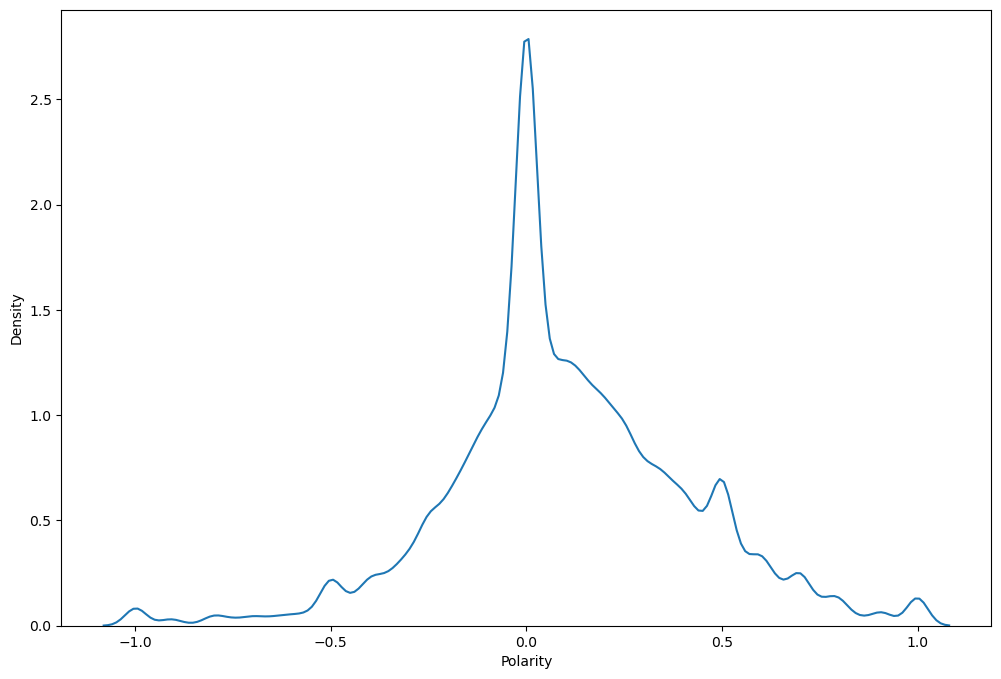

In [30]:
# Density of Polarity
sns.kdeplot(data = df, x = "Polarity")

<Axes: xlabel='Polarity', ylabel='Count'>

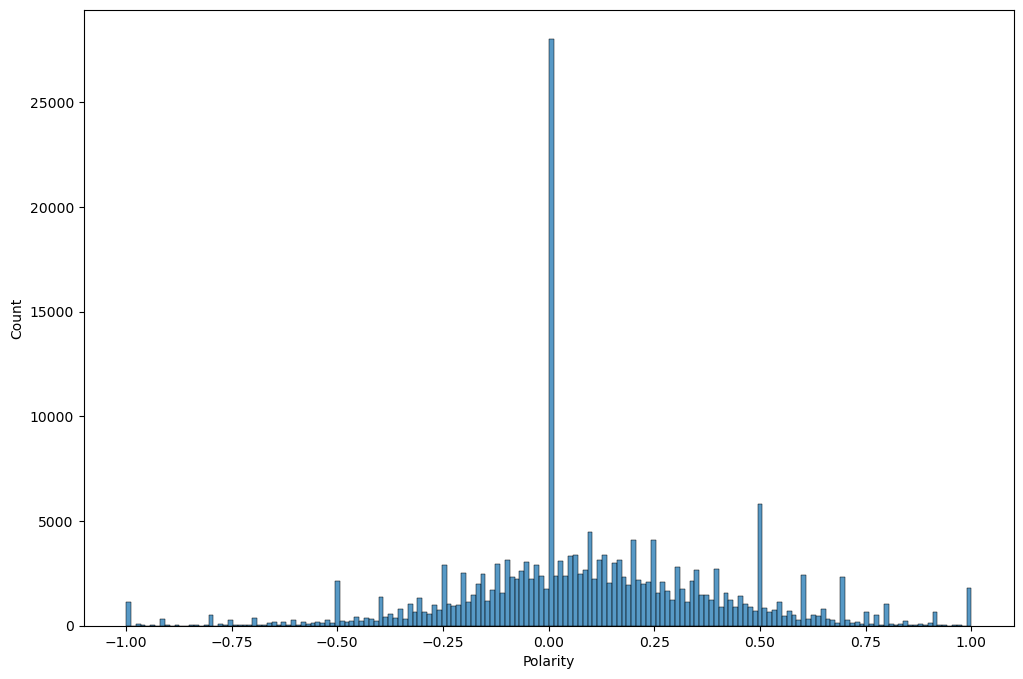

In [31]:
sns.histplot(data = df, x = 'Polarity')

In [32]:
count = df['Sentiment Analysis'].value_counts()

<Axes: xlabel='Sentiment Analysis', ylabel='count'>

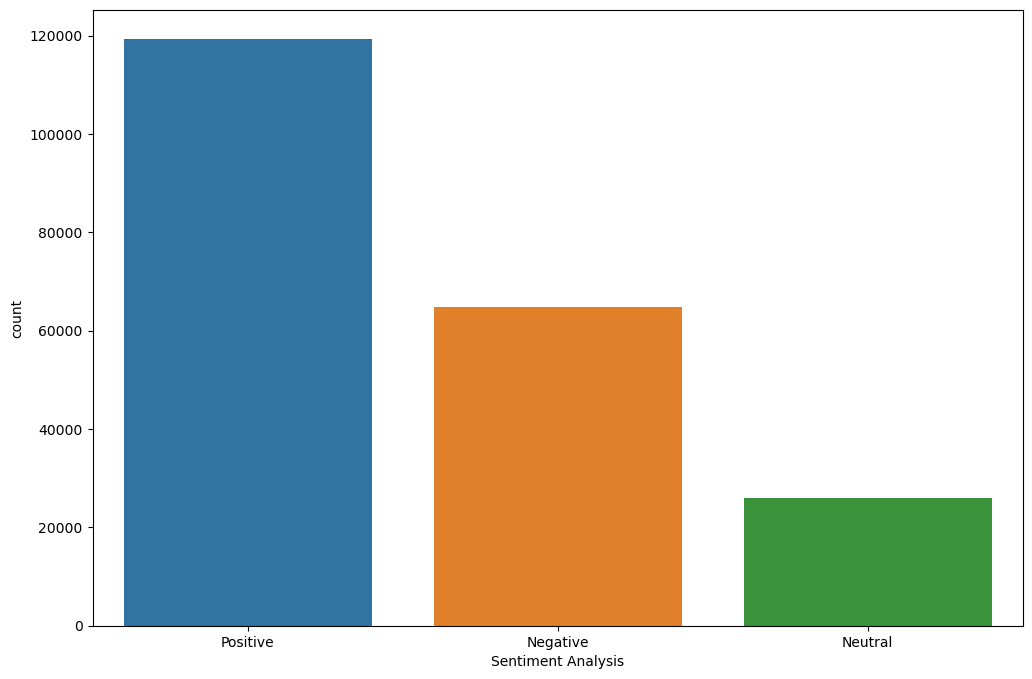

In [33]:
sns.countplot(data = df, x = 'Sentiment Analysis')

## Machine Learning Process

In [34]:
dataset = df
dataset.rename(columns= {'review_description' : 'text'}, inplace = True)

In [35]:
dataset = dataset[['text', 'Sentiment Analysis']]

In [36]:
dataset

,text,Sentiment Analysis
0,"The app is good for connecting with friends, f...",Positive
1,"Used to be my favorite social media app, but ""...",Negative
2,Instagram is the best of all the social media....,Positive
3,"I love this app.. but as of late, I have been ...",Positive
4,Used to be a great app but there are so many m...,Positive
...,...,...
210537,I love the app but lately my dms have been mes...,Negative
210538,Fun and addictive. Let's me see new ideas for ...,Positive
210539,User friendly and all things are available for...,Positive
210540,There are issues when you upload a story from ...,Neutral


### Encoding sentiments into numerical values

In [37]:
le = LabelEncoder()
dataset['Sentiment Analysis'] = le.fit_transform(dataset['Sentiment Analysis'])

/tmp/ipykernel_20/930917343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment Analysis'] = le.fit_transform(dataset['Sentiment Analysis'])


### Prepare data for training

In [38]:
the_pipeline = Pipeline([
    ('Vectorizing', CountVectorizer()),
    ('TFID', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [39]:
X = dataset['text']
y = dataset['Sentiment Analysis']
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [40]:
the_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('Vectorizing', CountVectorizer()),
                ('TFID', TfidfTransformer()), ('classifier', MultinomialNB())])

In [41]:
prediction = the_pipeline.predict(xtest)

In [42]:
confusion_matrix(ytest, prediction)

array([[ 6267,     3, 10067],
       [  581,    70,  5820],
       [  685,    10, 29015]])

In [43]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.83      0.38      0.53     16337
           1       0.84      0.01      0.02      6471
           2       0.65      0.98      0.78     29710

    accuracy                           0.67     52518
   macro avg       0.77      0.46      0.44     52518
weighted avg       0.73      0.67      0.61     52518



In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, prediction)

0.6731406374957157